# Tobig's 18기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크마운 또는 주석으로 설명해주세요

## 데이터

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Tobigs/week2/assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다. 

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"] #bias는 하나의 뉴런에서 활성화 함수를 거쳐 최종적으로 출력되는 값을 조절하는 역할을 합니다
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [8]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [9]:
# parameter 개수
N = len(X_train.loc[0])

In [10]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.6860028 , 0.40419938, 0.22438181])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X_i \theta$

In [11]:
def dot_product(X, parameters):
    z = 0
    for i in range(len(parameters)):
        z += np.array(X[i])*parameters[i] #dataframe 상태로는 더하기를 할 수 없어 numpy형태로  데이터 타입을 바꿔준 후 더하기 진행
                                          #parameter[i]는 숫자형태로 행렬곱을 할 수 없어 *으로 내적 진행
    return z

## Logistic Function

## $p = \frac{1}{1+e^{-X_i\theta}}$

In [12]:
def logistic(X, parameters):
    z = dot_product(X,parameters)
    p = 1/(1+(2.71828182845904**-z))    #math를 import 하지 않고 exponetial을 이용한 연산을 할수 없어서 그냥 e=2.17...의 값을 직접 넣었습니다.
    return p

In [13]:
logistic(X_train.iloc[1], parameters)

0.7640603163993477

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 강의에 나온대로 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p) = -\Sigma(y_i logP(X_i)+(1-y_i)log(1-P(X_i))) $

In [14]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X, parameters)
    loss =y*np.log(p)+(1-y)*np.log(1-p) #위에 적은 함수 그대로 적용
    return -loss

In [15]:
def mse_i(X, y, parameters):
    y_hat = dot_product(X,parameters) #mse는 회귀에서 사용하는 검증방법으로, 실제값과 예측값의 차이를 제곱하여 더해 이를 평균 낸 값이다.
    loss = (y-y_hat)**2
    return loss

In [16]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n:현재 배치의 데이터 수
    loss = 0
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        loss += minus_log_cross_entropy_i(X, y, parameters)
    loss = loss/n #loss 평균값으로 계산 #minus_log_cross_entropy_i에서 일일히 loss값을 구했으므로, 이를 합하여 나눠준다.
    return loss

In [17]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test)) 

1.0751444053162427

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)=-X_j\Sigma(y_j - \theta^{T}X_j)^2$ 
## ${\partial\over{\partial \theta_j}}l(p)=-X_j\Sigma(y_j-p_j)$ 

In [18]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
        y_hat = dot_product(X,parameters)
        gradient = X*mse_i(X, y, parameters) 
    else:
        p = logistic(X, parameters)
        gradient = X*(y-p)
    return -gradient

In [19]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

bias         -0.376271
experience   -0.070699
salary        0.430204
Name: 0, dtype: float64

In [20]:
from IPython.display import Image

Image("C:/Users/김건우/Desktop/배치알고리즘_구현.png")

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [21]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]
    
    for i in range(len(X_set)):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X, y, parameters, i, model)[j] #for문이 parameter에 대해서 적혀져 있으므로, 이에 맞춰 gradient또한 값을 일일히 정해주는 방향으로 적었습니다.
    
    return gradients

In [22]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[55.94238941733061, 0.00849941134720189, 30.499318711636057]

## mini-batch
인덱스로 미니 배치 나누기

In [23]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
### 설명: data를 입력받아 data를 쪼갭니다. batch_size만큼 쪼개집니다.
ex) data가 6개이고 batch size가 2이면 2개씩 총 3개의 data set이 만들어집니다.

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [24]:
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수
    for i in range(len(parameters)):
        gradients[i] *= learning_rate
    
    parameters -= gradients #위에 첨부해주신 이미지 참고하였습니다.
    return parameters

In [25]:
step(parameters, gradients1, 0.01, len(X_train))

array([ 0.1265789 ,  0.40411439, -0.08061137])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기를 1번 갱신할 때 사용하는 데이터셋  
- epoch: 학습을 할때마다 epoch가 1씩 늘어납니다.
- num_epoch:학습을 몇번 반복할지 정하는 변수입니다.
<br>

BGD: batch size가 data의 length과 같습니다.<br>
SGD: batch size가 1입니다.<br>
MGD: batch sizerk data의 length와 1사이 입니다.<br>

<br>
batch_size에 따른 경사하강법의 종류를 적어주세요  
batch_size=1 -> BGD 
batch_size=k -> MGD  
batch_size=whole -> SGD  

In [26]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False
    
    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)
    
    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            gradients = batch_gradient(X_batch, y_batch, parameters, model)
            parameters = step(parameters, gradients, learning_rate, batch_size)
            new_loss = batch_loss(X_train, y_train, parameters, loss_function, len(X_batch))
            
            #중단 조건
            if abs(new_loss - loss) < tolerance:
                stopper = True
                break
            loss = new_loss
        
        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")
    
    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수 찾아보세요. 학습을 진행할 때, Hyper Parameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

In [27]:
new_param_bgd = gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic',batch_size =len(X_train))
new_param_bgd

epoch: 0  loss: 1.4255984414198577  params: [-3.60369101 -0.94248274 -4.05740613]  gradients: [3.8001539942548983, 1.5558655899595755, 4.7151798599757475]
epoch: 100  loss: 0.363319729993509  params: [-2.21390171  4.49364613 -5.59671675]  gradients: [-0.1221116968750201, 1.182774611300451, 1.305654222603394]
epoch: 200  loss: 0.36349218993257915  params: [-2.21446665  4.49340933 -5.59853425]  gradients: [-0.12242288796781003, 1.1844699174932085, 1.3078555191105177]
epoch: 300  loss: 0.3634925693323111  params: [-2.21446677  4.4934055  -5.59853515]  gradients: [-0.12242281098465935, 1.1844730663850596, 1.3078597210288645]
epoch: 400  loss: 0.3634925688579899  params: [-2.21446677  4.4934055  -5.59853514]  gradients: [-0.12242280982160668, 1.1844730614910353, 1.307859714718382]
epoch: 500  loss: 0.36349256885642006  params: [-2.21446677  4.4934055  -5.59853514]  gradients: [-0.12242280982141943, 1.1844730614776207, 1.307859714700571]
epoch: 600  loss: 0.36349256885642095  params: [-2.214

array([-2.33688958,  5.67787856, -4.29067543])

In [28]:
new_param_sgd = gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size =1)
new_param_sgd

epoch: 0  loss: 61.737618183568706  params: [-0.87229768  1.16614322 -1.28915831]  gradients: [0.02497422206147791, 0.013590995532902697, 0.017571631425852892]


array([-1.25451452,  1.95444756, -1.82463847])

In [29]:
new_param_mgd = gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16)
new_param_mgd

epoch: 0  loss: 10.574855293597999  params: [-0.93064406  1.0236441  -1.21494265]  gradients: [0.08869890175465277, 0.09724901062828556, 0.15036595959323473]
epoch: 100  loss: 7.476719884352801  params: [-1.95228103  4.17931959 -4.05832555]  gradients: [0.0501130440351303, 0.0750608403030915, 0.08538216308648215]
epoch: 200  loss: 7.476719430091123  params: [-1.95231597  4.17942224 -4.05841886]  gradients: [0.05011266775584098, 0.07506045689215046, 0.08538107396869328]
epoch: 300  loss: 7.476719430059576  params: [-1.95231597  4.17942225 -4.05841887]  gradients: [0.050112667729615284, 0.07506045686542732, 0.08538107389278243]
epoch: 400  loss: 7.476719430059568  params: [-1.95231597  4.17942225 -4.05841887]  gradients: [0.050112667729613425, 0.07506045686542544, 0.0853810738927772]
epoch: 500  loss: 7.476719430059568  params: [-1.95231597  4.17942225 -4.05841887]  gradients: [0.050112667729613425, 0.07506045686542544, 0.0853810738927772]
epoch: 600  loss: 7.476719430059568  params: [-1

array([-1.95231597,  4.17942225, -4.05841887])

### Predict Label

In [30]:
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [31]:
from sklearn.metrics import *

In [32]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[35,  5],
       [ 1,  9]])

In [33]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.88


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [34]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [35]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [36]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.53631331, 2.76295295])

In [57]:
#경사하강법
new_param = gradient_descent(X, y, num_epoch = 1,batch_size =len(X))
new_param

epoch: 0  loss: -25.964902578379917  params: [19.52874695 12.94381417]  gradients: [-19.092297189731664, -12.908513350047507]


array([19.52874695, 12.94381417])

In [58]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

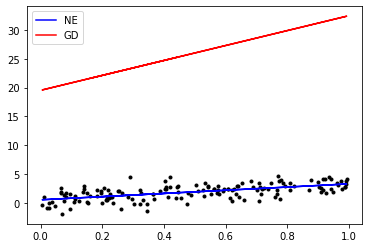

In [59]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()